Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/diabetes_.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [6]:
cols_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df_clean = df.copy()
for col in cols_missing:
  median_value = df_clean[col].median()
  df_clean[col] = df_clean[col].replace(0, median_value)
print("Missing data handled: ")
print(df_clean.head())

Missing data handled: 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [9]:
X = df.iloc[:,:-1].values
Y = df.iloc[:, -1].values

print("Shape of X:", X.shape)
print("Shape of y:", Y.shape)

np.random.seed(42) #For repeatabiltiy

#Shuffle the data
indices = np.random.permutation(len(X))

#70% of data for training
train_size = int(0.7 * len(X))

train_index = indices[:train_size]
test_index = indices[train_size:]

#Create splits
X_train = X[train_index]
X_test = X[test_index]
Y_train = Y[train_index]
Y_test = Y[test_index]

print("Training sample: ", len(X_train))
print("Testing sample: ", len(X_test))

Shape of X: (768, 8)
Shape of y: (768,)
Training sample:  537
Testing sample:  231


4. Implement KNN:<br>
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).<br>
• Compute distances using Euclidean distance.<br>
• Write functions for:<br>
– Predicting the class for a single query.<br>
– Predicting classes for all test samples.<br>
• Evaluate the performance using accuracy.<br>

In [17]:
#4
import numpy as np

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum(x1 - x2) ** 2)

def predict_one(x_query, k=5):
  distance=[]

  for a in range(len(X_train)):
    dist = euclidean_distance(x_query, X_train[a])
    distance.append((dist, Y_train[a]))

  #Sort by distance
  distance.sort(key=lambda x:x[0])

  #take k nearest
  k_neighbours = distance[:k]

  #Extract classes of neighbours
  classes = [label for (d, label) in k_neighbours]

  #Majority voting
  prediction = max(set(classes), key=classes.count)

  return prediction

def predict(X_test, k=5):
  predictions=[]
  for x in X_test:
    predictions.append(predict_one(x, k))
  return np.array(predictions)

Y_pred = predict(X_test, k=5 )
accuracy = np.sum(Y_pred == Y_test ) / len(Y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.6190476190476191


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.

In [11]:
X_scaled = X.copy().astype(float)

for col in range(X_scaled.shape[1]):
    xmin = X_scaled[:, col].min()
    xmax = X_scaled[:, col].max()
    X_scaled[:, col] = (X_scaled[:, col] - xmin) / (xmax - xmin)

print("Scaling Completed")
print(X_scaled[:5])


Scaling Completed
[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [13]:
X_train_scaled = X_scaled[train_index]
X_test_scaled  = X_scaled[test_index]

# Predict again using scaled test dataset
Y_pred_scaled = predict(X_test_scaled, k=5)

scaled_accuracy = np.sum(Y_pred_scaled == Y_test) / len(Y_test)

print("Original accuracy :", accuracy)
print("Scaled accuracy   :", scaled_accuracy)


Original accuracy : 0.6190476190476191
Scaled accuracy   : 0.658008658008658


Before scaling, the KNN achieved an accuracy of 0.61. After applying Min-Max scaling to the matrix and re-running KNN
the accuracy increased to 0.65. Therefore, scaling resulted in noticeable improvement in model performance.

Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

In [14]:
import time
import matplotlib.pyplot as plt

k_values = range(1,16)
original_acc =[]
scaled_acc =[]
original_time = []
scaled_time = []

for k in k_values:
  #Original
  start = time.time()
  Y_pred = predict(X_test, k=k)
  end = time.time()

  acc = np.sum(Y_pred == Y_test) / len(Y_test)
  time_taken = end - start

  original_acc.append(acc)
  original_time.append(time_taken)

  #Scaled
  start = time.time()
  Y_pred_scaled = predict(X_test, k=k)
  end = time.time()

  acc_scaled = np.sum(Y_pred_scaled == Y_test) / len(Y_test)
  time_taken_scaled = end - start

  scaled_acc.append(acc_scaled)
  scaled_time.append(time_taken_scaled)
print("Experiment Finished.")

Experiment Finished.


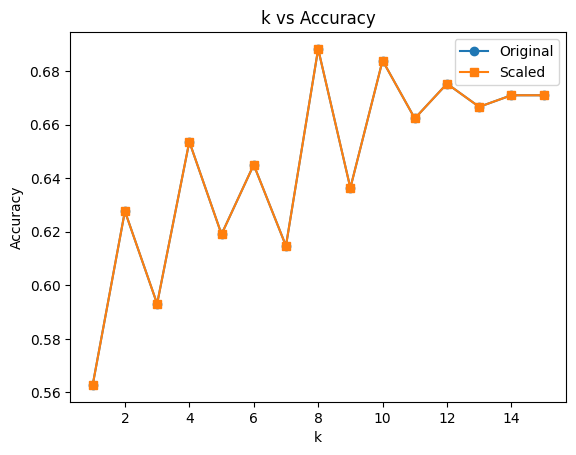

In [15]:
plt.figure()
plt.plot(k_values, original_acc, marker='o', label='Original')
plt.plot(k_values, scaled_acc, marker='s', label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.show()


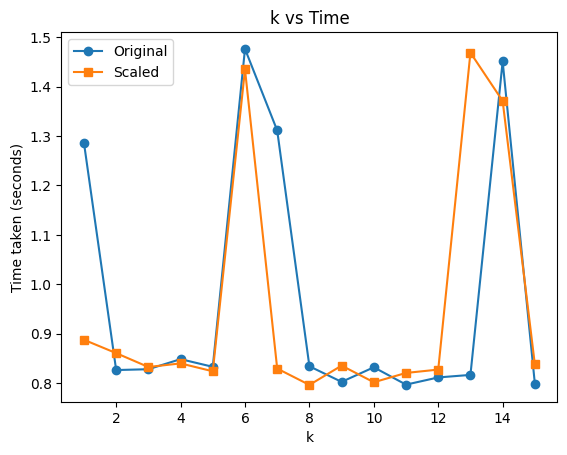

In [16]:
plt.figure()
plt.plot(k_values, original_time, marker='o', label='Original')
plt.plot(k_values, scaled_time, marker='s', label='Scaled')
plt.xlabel('k')
plt.ylabel('Time taken (seconds)')
plt.title('k vs Time')
plt.legend()
plt.show()


Problem - 4 - Additional Questions {Optional - But Highly Recommended}:
• Discuss the challenges of using KNN for large datasets and high-dimensional data.
• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

KNN is a lazy algorithm meaning it stores all the training data and performing calculation in prediction time.<br>
For large datasets, comparing the distance between the test sample and training sample can be very slow when making prediction for many instances.<br>
High Usage of Memory: Since KNN stores the entire training dataset, large datasets requires high memory which can be impractical.

To improve the efficiency of KNN, we can reduce the dimension, use nearest approxiamtely neighbors, optimize data structures, scale features, and sample data intelligently.